In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import time, datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# data load, check shape
train = pd.read_csv('train.csv')
train.shape

(10886, 12)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
# datetime의 형식 확인후 datetime 자료형으로 변경
type(train.datetime.iloc[0])

str

In [6]:
# pandas 내장 함수를 이용하여 datetime 자료형으로 변경
train['datetime'] = pd.to_datetime(train['datetime'])

# apply를 적용하여 datetime에서 각 시간 항목들을 별도로 추출
train['year'] = train['datetime'].apply(lambda x: x.year)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['day'] = train['datetime'].apply(lambda x: x.day)
train['hour'] = train['datetime'].apply(lambda x: x.hour)
train['minute'] = train['datetime'].apply(lambda x: x.minute)
train['second'] = train['datetime'].apply(lambda x: x.second)

train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


Text(0.5, 1.0, 'rental history per year')

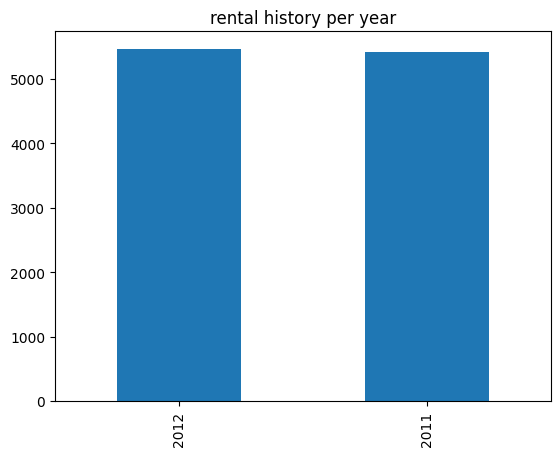

In [8]:
# 각 항목의 세부 개수 확인
train['year'].value_counts().plot.bar()
plt.title('rental history per year')

Text(0.5, 1.0, 'rental history per month')

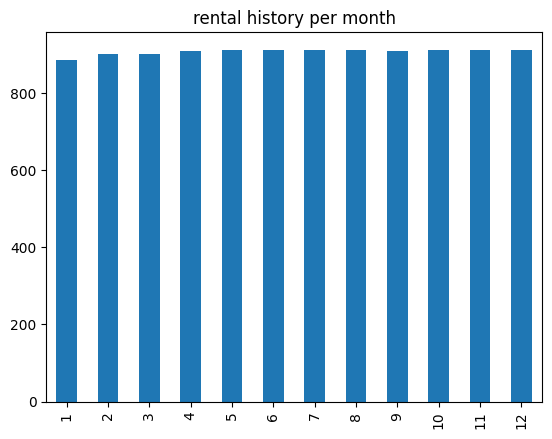

In [9]:
train['month'].value_counts().sort_index().plot.bar()
plt.title('rental history per month')

Text(0.5, 1.0, 'rental history per hour')

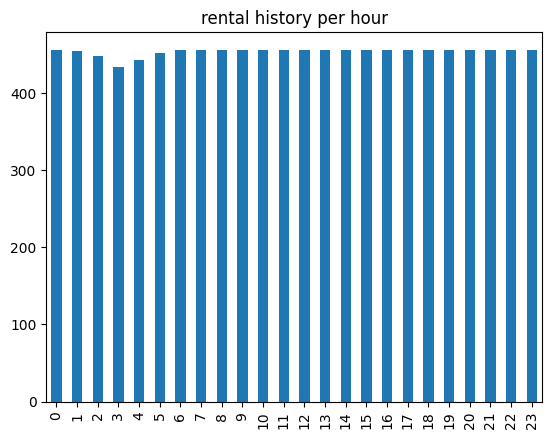

In [10]:
train['hour'].value_counts().sort_index().plot.bar()
plt.title('rental history per hour')

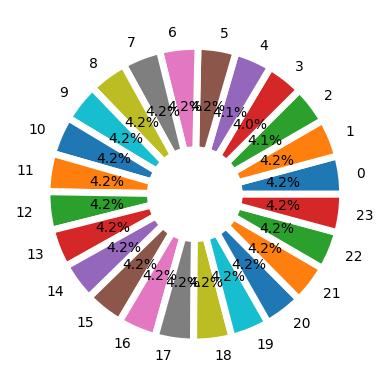

In [ ]:
# 마땅히 차이가 없는 거 같아서 pie plot으로도 그려봄
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.pie(train['hour'].value_counts().sort_index(), labels = train['hour'].value_counts().sort_index().index,
        autopct = '%.1f%%',
        wedgeprops = wedgeprops )
plt.show()

In [11]:
# 각 시간 요소들을 한번에 plot 그려봄
times = ['year','month','day','hour','minute','second']

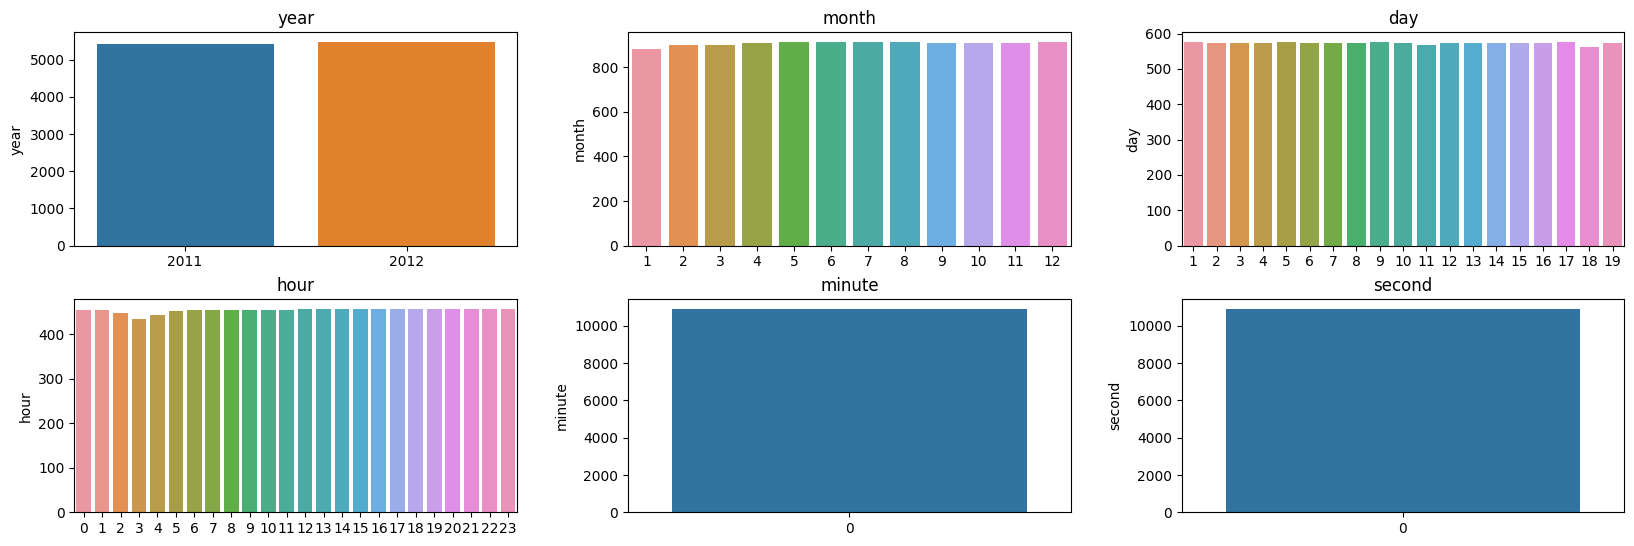

In [12]:
plt.figure(figsize=(20,6))
for i in range(len(times)):
    plt.subplot(2,3,i+1)
    sns.barplot(x=train[times[i]].value_counts().index , y=train[times[i]].value_counts() )
    plt.title(times[i])
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.25, hspace=0.25)
plt.show()

In [13]:
set(train.minute) # 유니크 값이 하나밖에 없음

{0}

In [14]:
set(train.second) # 유니크 값이 하나밖에 없음

{0}

In [15]:
train.info() # null 값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [ ]:
train.season.value_counts() # 각 항목에 대한 값 확인

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [ ]:
train.holiday.value_counts() # 각 항목에 대한 값 확인

0    10575
1      311
Name: holiday, dtype: int64

<Axes: >

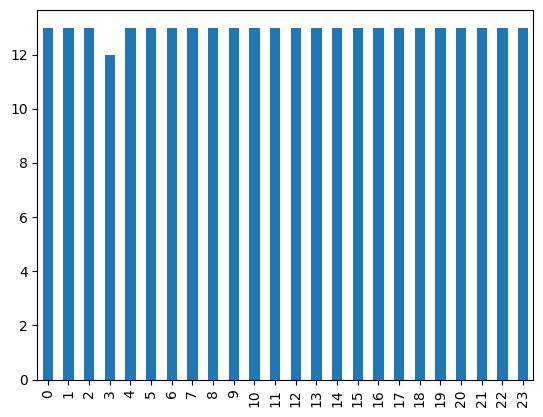

In [ ]:
train[train.holiday==1].hour.value_counts().sort_index().plot.bar() # 휴일에 시간별 변동이 있을까 했지만 딱히 없음

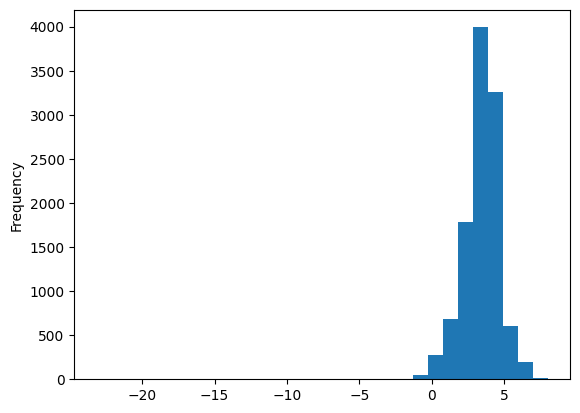

(100, 19)

In [ ]:
train['dtemp'] = train['atemp'] - train['temp'] # 체감과 실제온도에 대한 값에 대한 차이 확인
train['dtemp'].plot.hist(bins = 30)
plt.show()
train[train['dtemp']<0].shape

In [ ]:
del train['dtemp'] # 체감과 실제온도에 대한 값에 대한 차이가 correlation이 별로 없어서 제거함

In [ ]:
train.corr(method='pearson')['count'].sort_values(ascending = False)[3:15] # count (y)에 대한 높은 corr 값을 가지는 수치 뽑아봄

<ipython-input-127-a4552912411f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr(method='pearson')['count'].sort_values(ascending = False)[3:15]


hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

In [ ]:
cols = train.corr(method='pearson')['count'].sort_values(ascending = False)[3:15].index.tolist()  # list 저장
cols

<ipython-input-129-903ffd2e7a1b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = train.corr(method='pearson')['count'].sort_values(ascending = False)[3:15].index.tolist()


['hour',
 'temp',
 'atemp',
 'year',
 'month',
 'season',
 'windspeed',
 'day',
 'workingday',
 'holiday',
 'weather',
 'humidity']

In [ ]:
train_x , test_x, train_y,  test_y = train_test_split(train[cols], train['count'], test_size = 0.2, random_state = 23 )
train_x.shape, test_x.shape

((8708, 12), (2178, 12))

In [ ]:
model =  LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [ ]:
pred = model.predict(test_x)
pred.shape

(2178,)

In [ ]:
r = pd.Series(test_y).corr(pd.Series(pred))
r2 = r2_score(test_y, pred)
mse = mean_squared_error(test_y, pred)
rmse = np.sqrt(mean_squared_error(test_y, pred))
# r,r2,mse,rmse
print('Correlation score :',round(r,3))
print('R2 score :',round(r2,3))
print('MSE :',round(mse,3))
print('RMSE :',round(rmse,3))

Correlation score : -0.083
R2 score : 0.381
MSE : 21312.434
RMSE : 145.988


In [ ]:
res = pd.DataFrame({'temp':test_x['temp'],
                    'humidity':test_x['humidity'],
                    'pred': pred,
                    'true': test_y})

<Axes: xlabel='true', ylabel='pred'>

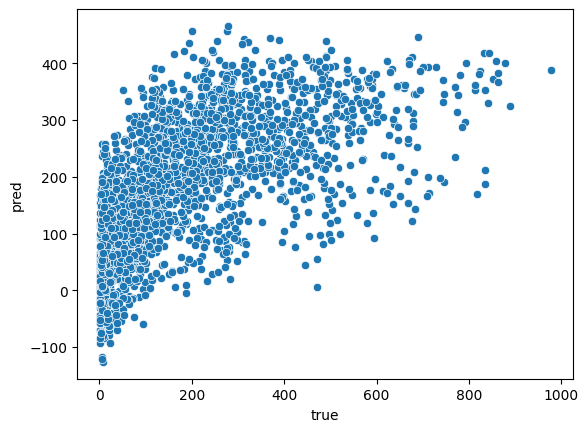

In [ ]:
sns.scatterplot(res, x ='true', y = 'pred')

<Axes: xlabel='temp', ylabel='pred'>

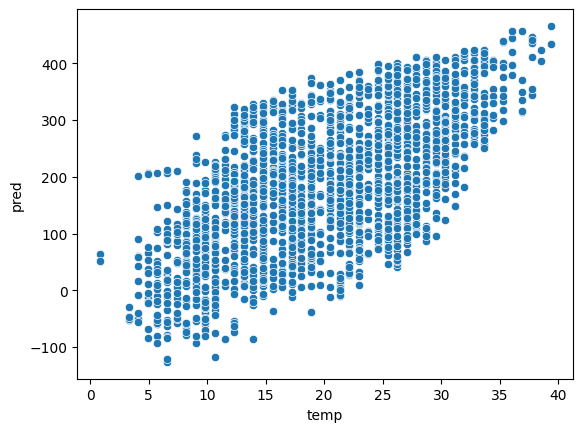

In [ ]:
sns.scatterplot(res, x ='temp', y = 'pred')

<Axes: xlabel='temp', ylabel='true'>

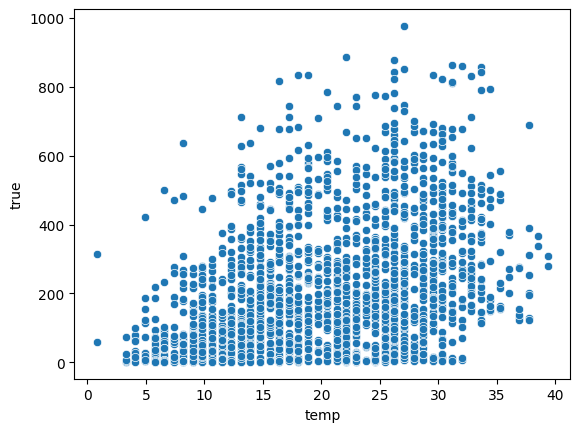

In [ ]:
sns.scatterplot(res, x ='temp', y = 'true')

<Axes: xlabel='humidity', ylabel='true'>

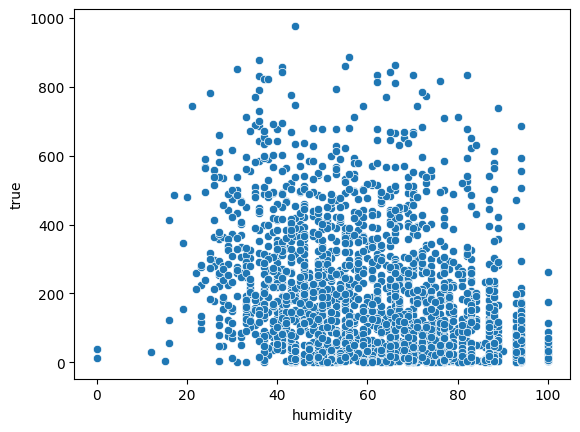

In [ ]:
sns.scatterplot(res, x ='humidity', y = 'true')